In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/content/usa-housing-train-preprocessed.csv')
df.head()

,Unnamed: 0,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0,-1.251559,-2.029014,1.962066,0.323068,0.745056,0.881446
1,1,-0.589051,0.518025,0.655811,-0.641265,1.098587,1.375771
2,2,0.822222,-0.574674,1.248231,-0.706094,-0.952839,1.137069
3,3,-0.256822,0.411710,-0.182614,-0.649369,-0.800950,0.928950
4,4,0.072036,0.941329,1.292845,0.250135,0.062022,1.392084


In [3]:
train_set = np.array(df)[:, 1:]
train_set.shape

(3500, 6)

In [4]:
X_train = train_set[:, :-1]
y_train = train_set[:, -1]
X_train.shape, y_train.shape

((3500, 5), (3500,))

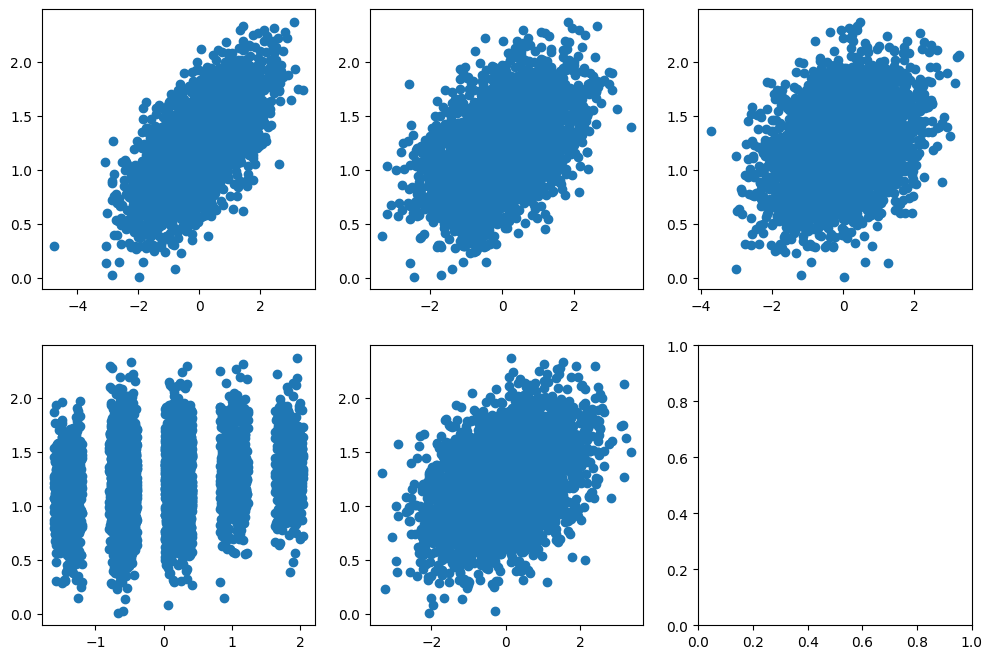

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

ax[0, 0].scatter(X_train[:, 0], y_train)
ax[0, 1].scatter(X_train[:, 1], y_train)
ax[0, 2].scatter(X_train[:, 2], y_train)
ax[1, 0].scatter(X_train[:, 3], y_train)
ax[1, 1].scatter(X_train[:, 4], y_train)

plt.show()

In [6]:
x = X_train[0]
x = np.hstack((np.ones(1), x))
x

array([ 1.        , -1.25155908, -2.02901391,  1.96206583,  0.32306769,
        0.74505618])

In [7]:
number_of_features = X_train.shape[1]
w = np.random.randn(number_of_features + 1)
w

array([ 0.20061836,  0.33997787, -0.18049814,  0.36114534, -0.88361385,
        0.40688634])

In [8]:
def multiple_linear_regression(X, w):
    y_hat = np.zeros(X.shape[0])
    for x_i, w_i in zip(X.T, w):
        y_hat += x_i * w_i
    return y_hat

multiple_linear_regression(X_train, w)[:5]

array([-1.83672237, -1.26274692,  0.33121251,  0.59462434,  0.13665856])

In [9]:
def loss_function(y_hat, y):
    return np.mean(np.power(y_hat - y, 2))

loss_function(multiple_linear_regression(X_train, w), y_train)

np.float64(2.7214805247706724)

In [55]:
X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
number_of_features = X.shape[1]
w = np.random.randn(number_of_features)

X.shape, w.shape

((3500, 6), (6,))

In [32]:
df_test = pd.read_csv('/content/usa-housing-test-preprocessed.csv')
test_set = np.array(df)[:, 1:]
X_test = test_set[:, :-1]
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_test = test_set[:, -1]
X_test.shape, y_test.shape

((3500, 6), (3500,))

In [56]:
epochs = 20
lr = 0.2
history = []

for epoch in range(epochs + 1):
    y_hat = multiple_linear_regression(X, w)

    loss = loss_function(y_hat, y_train)
    history.append(loss)

    gradients = []

    for x_i in X.T:
        gradients.append(2 * np.mean(x_i * (y_hat - y_train)))
    gradients = np.array(gradients)

    w -= lr * gradients

    predict = multiple_linear_regression(X_test, w)
    score = r2_score(y_test, predict)
    print(f'epoch={epoch}\tloss={loss:.4f}\tr2_score={round(score * 100, 2)}')

epoch=0	loss=6.9883	r2_score=-1767.5
epoch=1	loss=2.3805	r2_score=-561.24
epoch=2	loss=0.8429	r2_score=-141.66
epoch=3	loss=0.3080	r2_score=7.56
epoch=4	loss=0.1178	r2_score=61.25
epoch=5	loss=0.0494	r2_score=80.71
epoch=6	loss=0.0246	r2_score=87.79
epoch=7	loss=0.0156	r2_score=90.39
epoch=8	loss=0.0123	r2_score=91.35
epoch=9	loss=0.0110	r2_score=91.7
epoch=10	loss=0.0106	r2_score=91.84
epoch=11	loss=0.0104	r2_score=91.89
epoch=12	loss=0.0103	r2_score=91.91
epoch=13	loss=0.0103	r2_score=91.92
epoch=14	loss=0.0103	r2_score=91.93
epoch=15	loss=0.0103	r2_score=91.93
epoch=16	loss=0.0103	r2_score=91.93
epoch=17	loss=0.0103	r2_score=91.93
epoch=18	loss=0.0103	r2_score=91.93
epoch=19	loss=0.0103	r2_score=91.93
epoch=20	loss=0.0103	r2_score=91.93


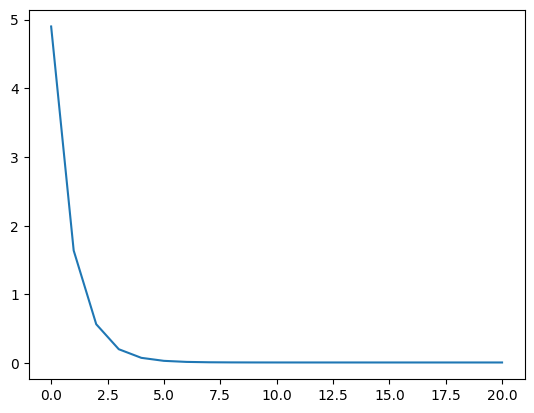

In [53]:
plt.plot(history)
plt.show()